In [2]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

In [27]:
def NFA_To_DFA(NFA, start_state, final_states):
    new_states = []
    DFA = {}  # DFA dictionary
    keys = list(
        start_state)  # contains all the states in NFA and the states created in DFA
    paths = list(NFA[start_state].keys())

    # 1st row of DFA transition table Computation
    DFA[start_state] = {}  # creating a nested dictionary in DFA
    for x in range(len(paths)):
        str = "".join(sorted(set(NFA[start_state][paths[
            x]])))  # creating a single string from all the elements of the list which is a new state
        DFA[start_state][paths[x]] = str  # assigning the state in DFA table
        if str not in keys:  # if the state is newly created
            new_states.append(str)  # then append it to the new_states
            keys.append(str)  # as well as to the keys which contains all the states

    # Other rows of DFA transition table Computation
    while len(new_states) != 0:  # condition is true only if the new_states is not empty
        DFA[new_states[0]] = {}  # taking the first element of the new_states and examining it
        for _ in range(len(new_states[0])):
            for i in range(len(paths)):
                temp = []  # creating a temporary list
                for j in range(len(new_states[0])):
                    state = new_states[0][j]
                    if state in NFA and paths[i] in NFA[state]:
                        temp += NFA[state][paths[i]]  # taking the union of the states
                str_new = "".join(sorted(set(temp)))  # creating a single string(new_state) from all the elements of the list
                if str_new not in keys:  # if the state is newly created
                    new_states.append(str_new)  # then append it to the new_states
                    keys.append(str_new)  # as well as to the keys which contains all the states
                DFA[new_states[0]][paths[i]] = str_new  # assigning the new state in the DFA table

        new_states.remove(new_states[0])  # Removing the first element in the new_states

    # Printing the DFA created
    print("\nDFA: ")
    DFA_transition = pd.DataFrame(DFA)
    print(DFA_transition.transpose())

    # Getting final states of the DFA
    DFA_final_states = []
    for y in DFA.keys():
        for i in y:
            if i in final_states:
                DFA_final_states.append(y)
                break

    # Printing final states of DFA
    print("\nDFA Final States: ", DFA_final_states)

    return DFA, DFA_final_states

In [31]:
def draw_dfa(DFA, start_state, final_states):
    graph = nx.DiGraph()
    for state in DFA:
        graph.add_node(state)
        for symbol in DFA[state]:
            graph.add_edge(state, DFA[state][symbol], label=symbol)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_size=500)
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos, font_size=7)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=5)
    plt.axis('off')
    plt.show()

In [36]:
NFA = {'A': {'0': ['A'], '1': ['A', 'B']}, 'B': {'0': ['C'], '1': ['C']}, 'C': {'0': ['D'], '1': ['D']}, 'D': {'0': ['E'], '1': ['E']}}
start_state = 'A'
final_states = ['D']
DFA, DFA_final_states = NFA_To_DFA(NFA, start_state, final_states)


DFA: 
          0      1
A         A     AB
AB       AC    ABC
AC       AD    ABD
ABC     ACD   ABCD
AD       AE    ABE
ABD     ACE   ABCE
ACD     ADE   ABDE
ABCD   ACDE  ABCDE
AE        A     AB
ABE      AC    ABC
ACE      AD    ABD
ABCE    ACD   ABCD
ADE      AE    ABE
ABDE    ACE   ABCE
ACDE    ADE   ABDE
ABCDE  ACDE  ABCDE

DFA Final States:  ['AD', 'ABD', 'ACD', 'ABCD', 'ADE', 'ABDE', 'ACDE', 'ABCDE']


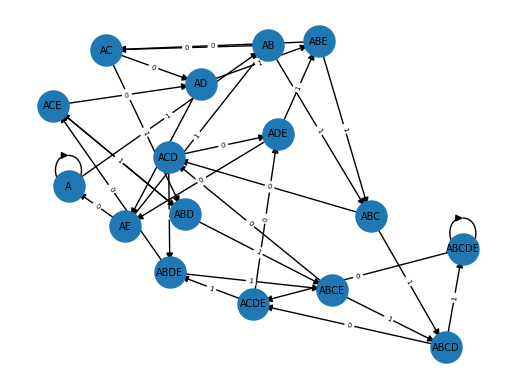

In [37]:
draw_dfa(DFA, start_state, final_states)